# Solution Map of Science 
### Read the file `pubmed_results.txt`, and extract all the US ZIP codes.

First, import the modules we'll need.

In [32]:
import re
import csv
import itertools
import pandas as pd
import matplotlib.pyplot as plt

Now read the whole file, and store it into a string.

In [33]:
f = open('Data/pubmed-antimicrob-set (1).txt',errors = 'ignore')
Carpetas = f.read()

In [34]:
len(Carpetas)

37496293

Note that the zipcode could be broken over two lines, as in line 43 of `pubmed-antimicrob-set (1).txt`

```
AD  - Biological and Biomedical Sciences Program, Harvard Medical School, Boston, MA
      02115, USA. Department of Genetics, Harvard Medical School, Boston, MA 02115,
      USA.
```

To avoid problems, replace each newline followed by 6 spaces with a single space.

In [35]:
Carpeta = re.sub(r'\n\s{6}', ' ', Carpetas)

We should now have every entry in a single line. Let's look at part of an entry:

In [38]:
Carpetas = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", Carpeta)
unique_codes = list(set(Carpetas))
unique_codes.sort()

In [39]:
a = unique_codes
print(a)

[', Acad.', ', Allemagne.', ', Amsterdam.', ', Angew.', ', Anichstr.', ', Antimicrob.', ', Antioquia.', ', Apdo.', ', Argentina.', ', Armenia.', ', Atsugi.', ', Auerbachstr.', ', Australia.', ', Austria.', ', Avda.', ', Ave.', ', BCS.', ', Bangladesh.', ', Barcelona.', ', Bari.', ', Basel.', ', Baxter.', ', Bdr.', ', Beijing.', ', Belarus.', ', Belgien.', ', Belgique.', ', Belgium.', ', Berlin.', ', Billrothstr.', ', Biochem.', ', Biochim.', ', Biophys.', ', Bldg.', ', Bleichstr.', ', Blvd.', ', Bombina.', ', Bonn.', ', Botswana.', ', Brasil.', ', Brazil.', ', Broad.', ', Bulgaria.', ', Bvd.', ', CSIC.', ', Cagliari.', ', Calif.', ', California.', ', Canada.', ', Chengdu.', ', Chile.', ', China.', ', Col.', ', Colombia.', ', Colorado.', ', Connecticut.', ', Copenhagen.', ', Croatia.', ', Crta.', ', Cryptococcus.', ', CsBPI.', ', CsgA.', ', Ctra.', ', Cuba.', ', Custodisstr.', ', Cyprus.', ', Czechia.', ', Dallas.', ', Denmark.', ', Dept.', ', Deutschland.', ', Dist.', ', Distt.', ', Di

In [40]:
r = unique_codes
r.remove(', Rod.')
r.remove(', Syst.')
r.remove(', Vic.')
r.remove(', Prof.')
r.remove(', Prov.')
r.remove(', Ref.')
r.remove(', SCK.')
r.remove(', Sec.')

ValueError: list.remove(x): x not in list

In [41]:
print (r)

[', Acad.', ', Allemagne.', ', Amsterdam.', ', Angew.', ', Anichstr.', ', Antimicrob.', ', Antioquia.', ', Apdo.', ', Argentina.', ', Armenia.', ', Atsugi.', ', Auerbachstr.', ', Australia.', ', Austria.', ', Avda.', ', Ave.', ', BCS.', ', Bangladesh.', ', Barcelona.', ', Bari.', ', Basel.', ', Baxter.', ', Bdr.', ', Beijing.', ', Belarus.', ', Belgien.', ', Belgique.', ', Belgium.', ', Berlin.', ', Billrothstr.', ', Biochem.', ', Biochim.', ', Biophys.', ', Bldg.', ', Bleichstr.', ', Blvd.', ', Bombina.', ', Bonn.', ', Botswana.', ', Brasil.', ', Brazil.', ', Broad.', ', Bulgaria.', ', Bvd.', ', CSIC.', ', Cagliari.', ', Calif.', ', California.', ', Canada.', ', Chengdu.', ', Chile.', ', China.', ', Col.', ', Colombia.', ', Colorado.', ', Connecticut.', ', Copenhagen.', ', Croatia.', ', Crta.', ', Cryptococcus.', ', CsBPI.', ', CsgA.', ', Ctra.', ', Cuba.', ', Custodisstr.', ', Cyprus.', ', Czechia.', ', Dallas.', ', Denmark.', ', Dept.', ', Deutschland.', ', Dist.', ', Distt.', ', Di

In [42]:
a = "".join(unique_codes)
b = a.split(", ")
c = "".join(b)
unique_zipcodes = c.split(".")

In [43]:
print(unique_codes[:20])

[', Acad.', ', Allemagne.', ', Amsterdam.', ', Angew.', ', Anichstr.', ', Antimicrob.', ', Antioquia.', ', Apdo.', ', Argentina.', ', Armenia.', ', Atsugi.', ', Auerbachstr.', ', Australia.', ', Austria.', ', Avda.', ', Ave.', ', BCS.', ', Bangladesh.', ', Barcelona.', ', Bari.']


In [44]:
len(unique_zipcodes)

267

In [45]:
%matplotlib inline

Coordenadas = pd.read_csv('Data/data_Coordenadas.csv', engine='python', skipfooter=3)
Coordenadas.head(15)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [46]:
Coordenadas.columns = ["Country", "Latitud", "Longitud", "Name"]
Coordenadas.head(10)

,Country,Latitud,Longitud,Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [47]:
Nombre = Coordenadas[Coordenadas.Name.isin(unique_zipcodes)]
Paises = Coordenadas[Coordenadas.Country.isin(unique_zipcodes)]
Mapa = pd.concat([Nombre,Paises]).drop_duplicates().sort_values('Name')

In [48]:
Mapa.head(10)

,Country,Latitud,Longitud,Name
10,AR,-38.416097,-63.616672,Argentina
6,AM,40.069099,45.038189,Armenia
13,AU,-25.274398,133.775136,Australia
12,AT,47.516231,14.550072,Austria
18,BD,23.684994,90.356331,Bangladesh
33,BY,53.709807,27.953389,Belarus
19,BE,50.503887,4.469936,Belgium
32,BW,-22.328474,24.684866,Botswana
28,BR,-14.235004,-51.925280,Brazil
21,BG,42.733883,25.485830,Bulgaria


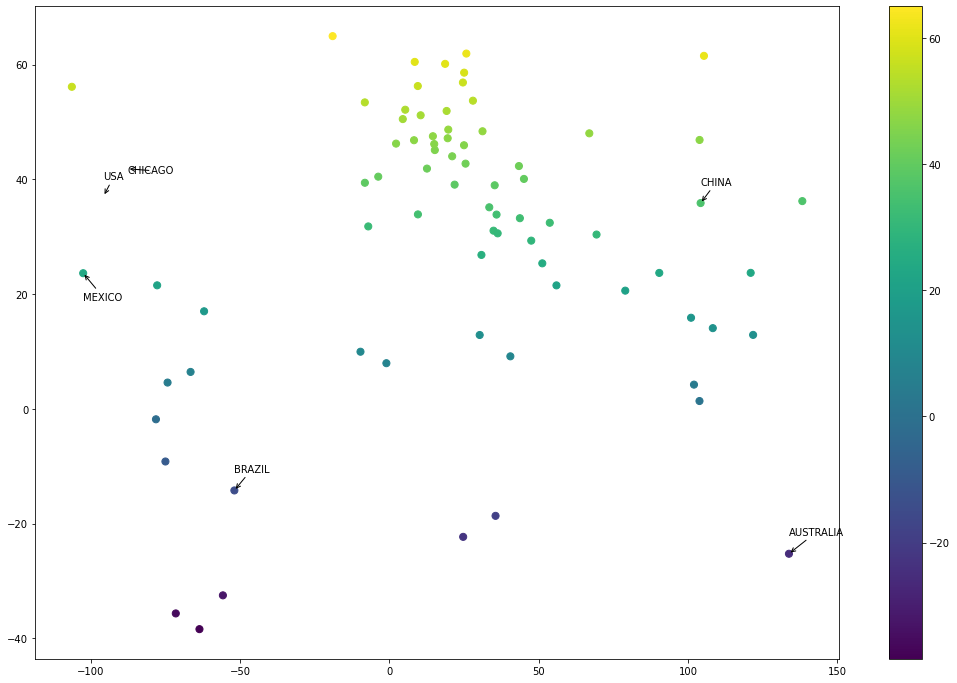

In [49]:
#matplotlib 
import matplotlib.pyplot as plt
plt.scatter(Mapa.Longitud, Mapa.Latitud, s=50, c=Mapa.Latitud)
plt.colorbar()

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('MEXICO', xy = (-102.552784, 23.634501), xytext = (-102.552784,19), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('CHICAGO', xy = ( -87.65005, 41.8379), xytext = (-87.65005, 41), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.savefig("Mapa of frogs.png")